# Sales Performance Analysis & Data Preprocessing

## 📌 Business Background
The management team aims to evaluate sales performance across branches and cities to identify revenue patterns, high-performing product lines, and potential operational improvements.

This project performs exploratory data analysis (EDA) and data preprocessing using Python and Pandas to transform raw transactional data into actionable business insights.


## 📊 Dataset Overview
The dataset contains transaction-level sales data including:

- Branch
- City
- Customer Type
- Product Line
- Total Sales
- Rating
- Date & Time


In [1]:
import pandas as pd

# Load main dataset
df = pd.read_csv('supermarket_sales.csv')

# Display first 5 rows
df.head()

# Ensure Date column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])


## 1. High-Value Transaction Analysis (Filtering)

### Objective
Identify high-value transactions (Total > 500) from Member customers and analyze their distribution across branches.

This analysis helps evaluate which branches generate more large-value purchases from loyal customers.

In [2]:
# Filter high-value transactions from Member customers
df_filter = df[(df['Total'] > 500) & (df['Customer type'] == 'Member')]
# Display first few records
df_filter.head()

# Count high-value transactions per branch
filter_branch = df_filter['Branch'].value_counts()
filter_branch


,count
Branch,
B,40
C,40
A,39


### Insight

Based on the filtering results for transactions with Total > 500 from Member customers, it is observed that high-value transactions are relatively evenly distributed across all branches. Branch B and C each recorded 40 transactions, while Branch A recorded 39 transactions, indicating no significant difference in contribution among locations for high-value Member purchases.

This finding suggests that Member customers consistently demonstrate strong purchasing behavior across branches and represent a valuable customer segment for the company. From a business perspective, the consistency of premium transactions among Members can support the development of loyalty strategies, retention programs, and exclusive offerings aimed at increasing customer lifetime value, without the need for highly differentiated branch-specific strategies.


## 2. Monthly Sales Analysis

### Objective
Analyze total monthly sales and determine the highest and lowest performing months.


In [3]:
# Create month column (monthly period format)
df['month'] = df['Date'].dt.to_period('M').astype(str)

# Calculate total sales per month
sales_per_month = df.groupby('month')['Total'].sum().reset_index()

# Sort total sales from highest to lowest
sales_per_month_sorted = sales_per_month.sort_values('Total', ascending=False)
sales_per_month_sorted


,month,Total
0,2019-01,116291.868
2,2019-03,109455.507
1,2019-02,97219.374


### Insight

January 2019 generated the highest total sales, while February 2019 recorded the lowest performance, followed by a recovery in March. This short-term fluctuation suggests potential seasonality or external factors affecting purchasing behavior.

Understanding these monthly variations is important for forecasting, promotional planning, and resource allocation, as it helps management anticipate revenue dips and optimize strategic interventions.


## 3. Branch Performance Analysis (Grouping & Aggregation)

### Objective
Compare the average transaction value and customer rating across branches.

This analysis helps evaluate branch performance in terms of revenue generation and customer satisfaction.


In [4]:
# Group data by Branch
group_branch = df.groupby('Branch').agg({
    'Total': ['mean', 'sum'],
    'Rating': 'mean'
}).reset_index()

group_branch


Branch       Total                 Rating
                mean          sum      mean
0      A  312.354031  106200.3705  7.027059
1      B  319.872506  106197.6720  6.818072
2      C  337.099715  110568.7065  7.072866

### Insight

Branch C records the highest average transaction value and the highest total sales, indicating stronger revenue performance compared to other branches.

In terms of customer satisfaction, Branch A and C show similar average ratings (around 7.07), while Branch B has the lowest average rating.

This suggests that Branch C demonstrates both strong financial performance and competitive customer satisfaction, making it a high-performing branch overall. Meanwhile, Branch B may require further evaluation to improve customer experience and transaction value.


## 4. Data Enrichment Using Join / Merging

### Objective
Combine the sales dataset with additional branch and product information to analyze performance differences across cities and product categories.

This step enhances the dataset by integrating contextual information for deeper analysis.


In [6]:
# Load additional datasets
branch_info = pd.read_csv('branch_info.csv')      # Example columns: Branch, City, Manager
product_info = pd.read_csv('product_info .csv')    # Example columns: Product line, Category

# Merge sales data with branch information
df_branch_merge = pd.merge(df, branch_info, on='Branch', how='left')

# Merge with product information
df_full = pd.merge(df_branch_merge, product_info, on='Product line', how='left')

df_full.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,gross margin percentage,gross income,Rating,month,Region,Manager,Opened Year,Category,Supplier,Warranty (months)
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,4.761905,26.1415,9.1,2019-01,South,Alice,2015,Beauty,Supplier A,12.0
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,4.761905,3.8200,9.6,2019-03,North,Charlie,2016,Electronics,Supplier B,24.0
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,4.761905,16.2155,7.4,2019-03,South,Alice,2015,Home,Supplier C,18.0
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,4.761905,23.2880,8.4,2019-01,South,Alice,2015,Beauty,Supplier A,12.0
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,4.761905,30.2085,5.3,2019-02,South,Alice,2015,NaN,NaN,NaN


In [7]:
df_full.groupby('City')['Total'].sum()

,Total
City,
Mandalay,106197.6720
Naypyitaw,110568.7065
Yangon,106200.3705


### Insight

After merging the transactional data with detailed branch information, the city-level analysis reveals differences in sales performance across locations. Naypyitaw recorded the highest total sales at 110,568.71, followed by Yangon at 106,200.37, and Mandalay at 106,197.67.

Although the differences in total sales are relatively small, the results indicate that the Naypyitaw branch contributes slightly more revenue compared to the other cities. The integration of location data provides additional context to the analysis, as incorporating geographic variables offers spatial insights that would not be visible when analyzing raw transaction data alone.

From a business perspective, performance differences across cities can serve as a basis for evaluating local market potential, revenue target setting, and operational resource allocation for each branch.


## 5. Product Line Performance by Branch (Pivot Analysis)

### Objective
Analyze which branch performs strongest in each product line based on average transaction value.

This pivot analysis helps identify branch-level strengths across different product categories.


In [8]:
# Create pivot table: average total sales by Product line and Branch
pivot_sales = pd.pivot_table(
    df,
    values='Total',
    index='Product line',   # Row categories
    columns='Branch',       # Column categories
    aggfunc='mean'
)

pivot_sales


Branch,A,B,C
Product line,,,
Electronic accessories,305.285225,310.026245,344.890445
Fashion accessories,320.245265,264.730911,331.693385
Food and beverages,295.915526,304.297770,360.103864
Health and beauty,268.037298,376.993585,319.525500
Home and lifestyle,344.879931,350.983290,308.790067
Sports and travel,328.350839,322.390306,350.265067


### Insight

The pivot table comparing the average transaction value for each product line across branches reveals differences in sales strength and customer preference.

Branch C demonstrates the strongest performance in most product lines, including Electronic Accessories (344.89), Fashion Accessories (331.69), and Food and Beverages (360.10). Branch B performs particularly well in Health and Beauty (376.99) and Home and Lifestyle (350.98), while Branch A shows relatively balanced performance but does not dominate in any specific product line. Additionally, in the Sports and Travel category, Branch C again records the highest average transaction value (350.27).

These results indicate that each branch has a distinct product strength profile, potentially reflecting differences in local market characteristics, customer demographics, or sales strategies implemented at each location.

From a managerial perspective, this insight can support inventory optimization, location-based marketing strategies, and targeted product allocation to maximize revenue through a more segmented approach.


## 6. Payment Method Distribution by Customer Type (Crosstab Analysis)

### Objective
Analyze the distribution of payment methods between Member and Normal customers.

This analysis helps identify differences in payment preferences across customer segments.


In [9]:
crosstab_pay = pd.crosstab(
    df['Customer type'],
    df['Payment'],
    normalize='index'   # Row-wise proportion (remove this argument for absolute counts)
)

crosstab_pay


Payment,Cash,Credit card,Ewallet
Customer type,,,
Member,0.335329,0.343313,0.321357
Normal,0.352705,0.278557,0.368737


### Insight

The crosstab analysis shows differences in payment preferences between Member and Normal customers.

Member customers display a relatively balanced distribution across payment methods, with a slight preference for credit cards (34.3%), followed closely by cash and e-wallet.

In contrast, Normal customers show a stronger preference for e-wallet payments (36.9%) and cash (35.3%), while credit card usage is comparatively lower (27.9%).

This suggests that Member customers may have greater access to or preference for traditional banking instruments, whereas Normal customers appear more inclined toward digital payment methods. From a business perspective, these insights can inform targeted promotional strategies and payment-based incentives tailored to each customer segment.


## 7. Dataset Expansion Using Appending

### Objective
Combine the main dataset with the enriched dataset to evaluate changes in total records and overall sales.

This step simulates data growth across periods and examines its impact on aggregate sales metrics.


In [10]:
# Append main dataset with enriched dataset (df_full)
df_append = pd.concat([df, df_full], ignore_index=True)

# Compare number of rows before and after appending
rows_before = df.shape[0]
rows_after = df_append.shape[0]

# Compare total sales before and after appending
total_before = df['Total'].sum()
total_after  = df_append['Total'].sum()

rows_before, rows_after, total_before, total_after

print("Number of Rows Before Append:", rows_before)
print("Number of Rows After Append:", rows_after)
print("Total Sales Before Append:", total_before)
print("Total Sales After Append:", total_after)

Number of Rows Before Append: 1000
Number of Rows After Append: 2000
Total Sales Before Append: 322966.749
Total Sales After Append: 645933.498


### Insight

After appending the main dataset with the additional dataset, the number of observations increased from 1,000 rows to 2,000 rows, indicating that the merging process successfully expanded the data coverage without altering the column structure.

In aggregate terms, total sales also increased from 322,966.75 to 645,933.50, reflecting consistent growth in recorded transactions as additional periods or contextual data were incorporated.

Such data expansion provides significant analytical value, particularly for supporting long-term sales trend evaluation, improving business estimation reliability, and enabling more comprehensive longitudinal or time-series analysis. Therefore, appending data represents a strategic step in enriching the dataset to support data-driven decision-making.


## 8. Datetime Analysis

### Objective
Identify the busiest day of the week and peak transaction hours based on total sales.

This analysis helps understand customer purchasing patterns across time.

In [12]:
# Extract day name and hour from Date and Time columns
df['day_name'] = df['Date'].dt.day_name()
df['hour'] = pd.to_datetime(df['Time']).dt.hour

# Calculate total sales by day
sales_per_day = df.groupby('day_name')['Total'].sum().sort_values(ascending=False)
sales_per_day

# Calculate total sales by hour
sales_per_hour = df.groupby('hour')['Total'].sum().sort_values(ascending=False)
sales_per_hour


/tmp/ipython-input-1516167183.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df['Time']).dt.hour


,Total
hour,
19,39699.5130
13,34723.2270
10,31421.4810
15,31179.5085
14,30828.3990
11,30377.3295
12,26065.8825
18,26030.3400
16,25226.3235


### Insight

The time-based analysis (hourly) indicates that peak sales occur at 19:00, with total sales reaching 39,699.51, followed by 13:00, 10:00, and 15:00.

This pattern suggests that transaction activity increases during lunch hours and early evening periods, which may be associated with customer purchasing behavior outside productive working hours or during leisure time. Additionally, the time range between 16:00 and 20:00 shows relatively stable sales contribution, even though it does not exceed the peak at 19:00.

From a business perspective, understanding these time patterns enables the company to optimize operational strategies, such as workforce scheduling, product display management, and time-based promotional campaigns. Aligning service capacity with high-traffic hours can also enhance customer experience and improve overall sales performance.


## 9. Feature Scaling Using StandardScaler

### Objective
Apply StandardScaler to selected numerical variables for exploratory data analysis (EDA) purposes.

The scaling process is performed on the full dataset (without train-test splitting) to examine how standardization affects variable distribution.

Selected variables:
- Total
- Unit price
- Quantity
- Rating


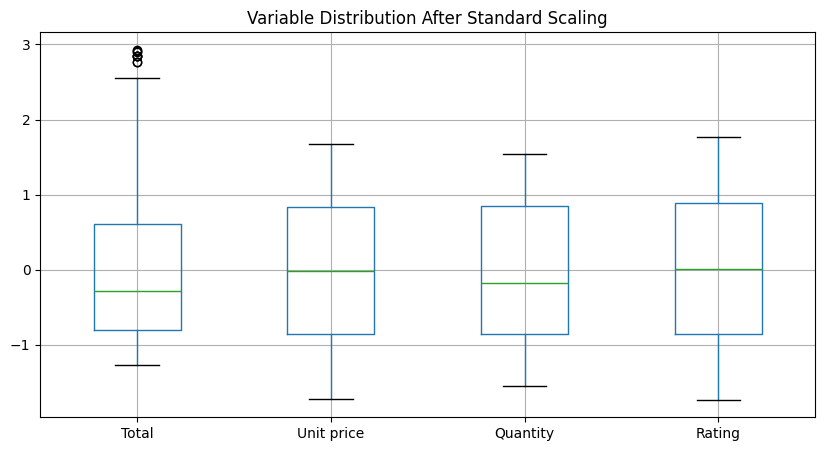

In [13]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# Select numerical columns for scaling
num_cols = ['Total', 'Unit price', 'Quantity', 'Rating']

# Initialize scaler
scaler = StandardScaler()

# Apply standard scaling
scaled = scaler.fit_transform(df[num_cols])

# Create dataframe from scaled results
df_scaled = pd.DataFrame(scaled, columns=num_cols)

# Visualize distribution after scaling
plt.figure(figsize=(10,5))
df_scaled.boxplot()
plt.title('Variable Distribution After Standard Scaling')
plt.show()

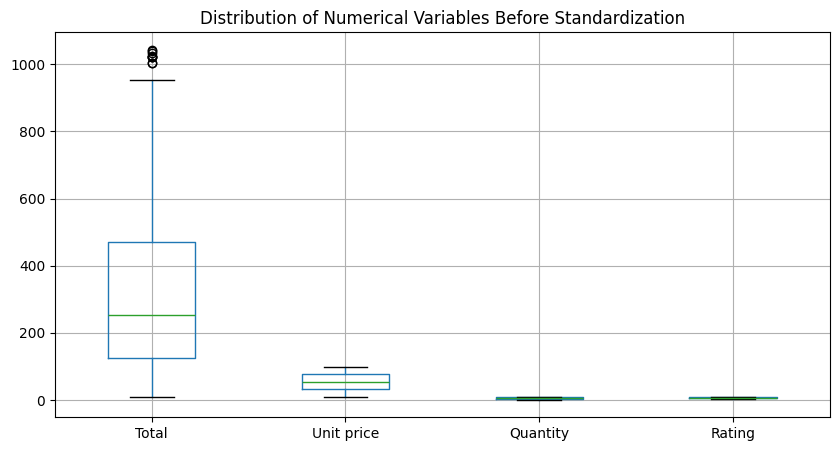

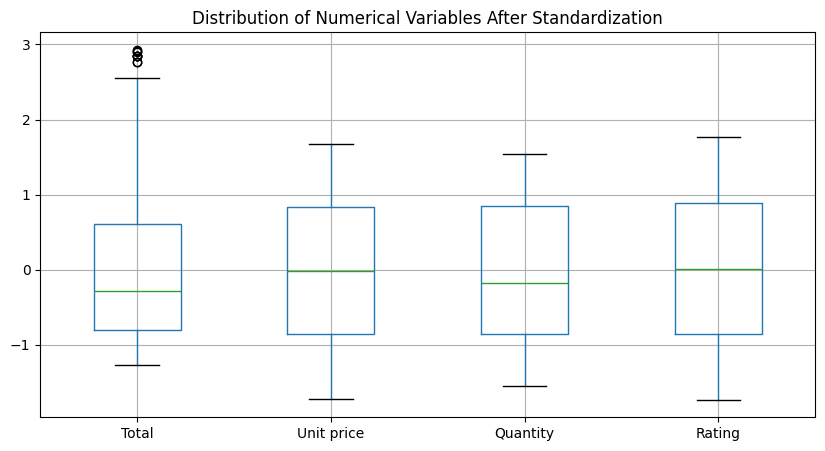

In [14]:
plt.figure(figsize=(10,5))
df[num_cols].boxplot()
plt.title('Distribution of Numerical Variables Before Standardization')
plt.show()

plt.figure(figsize=(10,5))
df_scaled.boxplot()
plt.title('Distribution of Numerical Variables After Standardization')
plt.show()


### Insight

Before applying standard scaling, the four numerical variables exhibited significantly different ranges and distribution scales. The Total variable showed the widest spread, with maximum values approaching 1,000 and several outliers, while Unit price, Quantity, and Rating were distributed within much smaller ranges. These scale differences made cross-variable comparison difficult, as variables with larger variance (such as Total) dominated the visualization and potentially obscured important patterns in other features.

After applying StandardScaler, all variables were projected onto the same scale, with a mean close to 0 and a variance close to 1. This transformation made the distributions more comparable and reduced visual bias caused by differences in units and value ranges. Although the Total variable still displayed outliers (indicated by high positive z-scores), the overall data structure became easier to analyze alongside other variables.

From an exploratory data analysis perspective, standard scaling facilitates the identification of patterns, anomalies, and relationships between features, and serves as an essential preprocessing step before applying statistical modeling or machine learning algorithms that are sensitive to feature magnitude.


## 10. Feature Scaling Using MinMaxScaler

### Objective
Apply MinMaxScaler to selected numerical variables to rescale values into a fixed range between 0 and 1.

The scaling process is applied to the full dataset (without train-test splitting) for exploratory data analysis purposes.

Selected variables:
- Total
- Unit price
- Quantity
- Rating

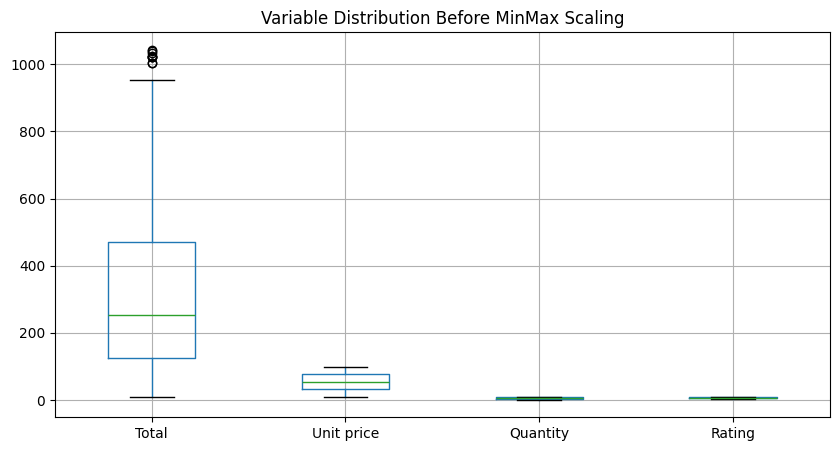

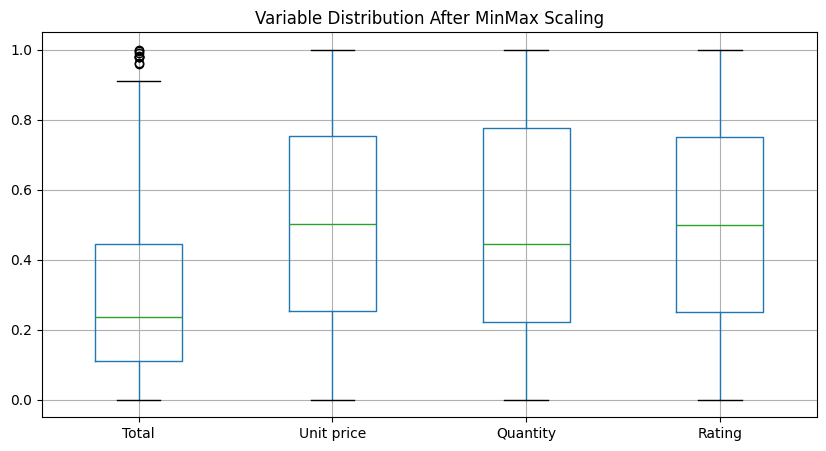

In [15]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Select numerical columns for scaling
num_cols = ['Total', 'Unit price', 'Quantity', 'Rating']

# Initialize MinMax scaler
scaler = MinMaxScaler()

# Apply MinMax scaling
scaled_minmax = scaler.fit_transform(df[num_cols])

# Create dataframe from scaled results
df_minmax = pd.DataFrame(scaled_minmax, columns=num_cols)

# Visualize distribution before scaling
plt.figure(figsize=(10,5))
df[num_cols].boxplot()
plt.title('Variable Distribution Before MinMax Scaling')
plt.show()

# Visualize distribution after MinMax scaling
plt.figure(figsize=(10,5))
df_minmax.boxplot()
plt.title('Variable Distribution After MinMax Scaling')
plt.show()

### Insight

Before applying MinMax Scaling, the four numerical variables exhibited significantly different value ranges, as reflected in the initial distribution. The Total variable had the widest range and visually dominated the graph, while Unit price, Quantity, and Rating were distributed within smaller intervals, making simultaneous analysis more challenging. These scale differences created difficulties in comparative evaluation, as variables with larger absolute values (such as Total) appeared more prominent than others.

After applying MinMax Scaling, all variables were transformed into a uniform range of [0, 1] without altering the underlying distribution shape or ordinal relationships between observations. This transformation preserves the relative information across records while eliminating the influence of differing measurement units and magnitudes.

Although outliers in the Total variable remain visible near the upper boundary (value close to 1), they no longer distort visual comparison since all features now share a homogeneous scale. From an exploratory data analysis perspective, MinMax Scaling is particularly useful for visualization, feature comparison, and analytical methods that require normalized value ranges, such as clustering or distance-based algorithms.


## Reflection

### 1. How did data manipulation techniques (filtering, grouping, and aggregation) help uncover insights that were not immediately visible in the raw data?

Data manipulation plays a critical role in transforming raw transactional data into structured and meaningful information. Through filtering, the analysis can focus on relevant sub-segments and eliminate unnecessary noise, enabling more targeted exploration.

Grouping and aggregation allow data to be organized by categories and summarized using key metrics such as averages and totals. This process reveals patterns and relationships that are not directly observable in raw datasets, such as branch performance comparisons, customer purchasing behavior, and transaction value variation across product categories.

Overall, data manipulation serves as a foundational step in exploratory data analysis, bridging the gap between raw data and actionable insights.

### 2. From the results of join/merge, pivot, and crosstab analyses, which insights are most relevant for business decision-making, and why?

The insights derived from join/merge, pivot, and crosstab analyses are highly relevant for business decision-making because they enrich the analytical context and highlight multi-dimensional relationships between variables.

The join/merge process provides geographic and structural context, enabling performance evaluation across cities and supporting resource allocation and revenue targeting strategies.

Pivot analysis uncovers branch-level strengths across different product lines, offering valuable input for inventory management, product placement, and location-based promotional strategies.

Meanwhile, crosstab analysis reveals differences in payment preferences between customer segments, which can inform targeted promotional campaigns and strategic partnerships with payment providers.

Collectively, these techniques support data-driven decision-making by providing a comprehensive view of operational performance and customer behavior.
